Data Analysis

In [44]:
import pandas as pd

df = pd.read_csv('../dataset/nba_logreg.csv')
# df

In [45]:
# Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1329 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [46]:
# Статистика для текстовых полей
df.describe(include=['O'])

,name
count,1340
unique,1294
top,Charles Smith
freq,9


In [47]:
# Статистика для числовых полей
df.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [48]:
# Пример данных
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Feature Engineering

In [49]:
# Проверяем нулевые значения
df.isnull().sum()

name            0
gp              0
min             0
pts             0
fgm             0
fga             0
fg              0
3p_made         0
3pa             0
3p             11
ftm             0
fta             0
ft              0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
dtype: int64

In [50]:
# Связь количества заработанных очков, времени в игре, количеством сыгранных игр с тем и процента попаданий с тем, что игрок продержится в лиге 5 лет
df[['pts', 'min', 'gp', 'ft', 'target_5yrs']].groupby('target_5yrs').mean()

,pts,min,gp,ft
target_5yrs,,,,
0.0,5.042829,14.252259,51.577603,68.858546
1.0,7.878700,19.690253,65.826715,71.183394


In [51]:
# Связь количества сыгранных игр с тем, что игрок продержится в лиге 5 лет
df['CategoricalGP'] = pd.qcut(df['gp'], 10, precision=0)
df[["CategoricalGP", "target_5yrs"]].groupby(['CategoricalGP'],).mean().sort_values(by='CategoricalGP', ascending=False)

,target_5yrs
CategoricalGP,
"(81.0, 82.0]",0.904348
"(79.0, 81.0]",0.868421
"(75.0, 79.0]",0.811321
"(69.0, 75.0]",0.707143
"(63.0, 69.0]",0.682171
"(56.0, 63.0]",0.602941
"(50.0, 56.0]",0.488889
"(43.0, 50.0]",0.485507
"(36.0, 43.0]",0.424242


In [52]:
# Связь времени на поле с тем, что игрок продержится в лиге 5 лет
df['CategoricalMIN'] = pd.qcut(df['min'], 10, precision=0)
df[["CategoricalMIN", "target_5yrs"]].groupby(['CategoricalMIN'],).mean().sort_values(by='CategoricalMIN', ascending=False)

,target_5yrs
CategoricalMIN,
"(30.0, 41.0]",0.887218
"(25.0, 30.0]",0.822222
"(21.0, 25.0]",0.759690
"(19.0, 21.0]",0.656716
"(16.0, 19.0]",0.666667
"(14.0, 16.0]",0.577778
"(12.0, 14.0]",0.481481
"(10.0, 12.0]",0.470149
"(8.0, 10.0]",0.500000


In [53]:
# Связь очков за игру с тем, что игрок продержится в лиге 5 лет
df['CategoricalPTS'] = pd.qcut(df['pts'], 10, precision=0)
df[["CategoricalPTS", "target_5yrs"]].groupby(['CategoricalPTS'],).mean().sort_values(by='CategoricalPTS', ascending=False)

,target_5yrs
CategoricalPTS,
"(13.2, 28.2]",0.879699
"(9.6, 13.2]",0.828358
"(8.0, 9.6]",0.807407
"(6.6, 8.0]",0.695312
"(5.6, 6.6]",0.621429
"(4.7, 5.6]",0.587786
"(4.0, 4.7]",0.569106
"(3.3, 4.0]",0.429630
"(2.6, 3.3]",0.390071


In [54]:
# Связь с процентом попаданий с тем, что игрок продержится в лиге 5 лет
df['CategoricalFG'] = pd.qcut(df['fg'], 10, precision=0)
df[["CategoricalFG", "target_5yrs"]].groupby(['CategoricalFG'],).mean().sort_values(by='CategoricalFG', ascending=False)

,target_5yrs
CategoricalFG,
"(52.0, 74.0]",0.639098
"(49.0, 52.0]",0.795455
"(47.0, 49.0]",0.750000
"(46.0, 47.0]",0.715385
"(44.0, 46.0]",0.669231
"(42.0, 44.0]",0.720588
"(41.0, 42.0]",0.598540
"(39.0, 41.0]",0.585185
"(37.0, 39.0]",0.398496


In [55]:
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,reb,ast,stl,blk,tov,target_5yrs,CategoricalGP,CategoricalMIN,CategoricalPTS,CategoricalFG
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,4.1,1.9,0.4,0.4,1.3,0.0,"(10.0, 36.0]","(25.0, 30.0]","(6.6, 8.0]","(23.0, 37.0]"
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,2.4,3.7,1.1,0.5,1.6,0.0,"(10.0, 36.0]","(25.0, 30.0]","(6.6, 8.0]","(23.0, 37.0]"
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,2.2,1.0,0.5,0.3,1.0,0.0,"(69.0, 75.0]","(14.0, 16.0]","(4.7, 5.6]","(41.0, 42.0]"
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.9,0.8,0.6,0.1,1.0,1.0,"(56.0, 63.0]","(10.0, 12.0]","(5.6, 6.6]","(42.0, 44.0]"
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,2.5,0.3,0.3,0.4,0.8,1.0,"(43.0, 50.0]","(10.0, 12.0]","(4.0, 4.7]","(52.0, 74.0]"


Encoding the independent variable

In [56]:
# Чтобы не работать с интервалами преобразуем их к значениям
def rightValue(interval):
  return interval.right

df['CategoricalGP'] = df['CategoricalGP'].apply(rightValue)
df['CategoricalMIN'] = df['CategoricalMIN'].apply(rightValue)
df['CategoricalPTS'] = df['CategoricalPTS'].apply(rightValue)
df['CategoricalFG'] = df['CategoricalFG'].apply(rightValue)
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,reb,ast,stl,blk,tov,target_5yrs,CategoricalGP,CategoricalMIN,CategoricalPTS,CategoricalFG
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,4.1,1.9,0.4,0.4,1.3,0.0,36.0,30.0,8.0,37.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,2.4,3.7,1.1,0.5,1.6,0.0,36.0,30.0,8.0,37.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,2.2,1.0,0.5,0.3,1.0,0.0,75.0,16.0,5.6,42.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.9,0.8,0.6,0.1,1.0,1.0,63.0,12.0,6.6,44.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,2.5,0.3,0.3,0.4,0.8,1.0,50.0,12.0,4.7,74.0


In [57]:
# Удаляем ненужные столбцы
drop_elements = ['min', 'gp', 'pts', 'fg']
df = df.drop(drop_elements, axis = 1)

In [58]:
df.head()

,name,fgm,fga,3p_made,3pa,3p,ftm,fta,ft,oreb,...,reb,ast,stl,blk,tov,target_5yrs,CategoricalGP,CategoricalMIN,CategoricalPTS,CategoricalFG
0,Brandon Ingram,2.6,7.6,0.5,2.1,25.0,1.6,2.3,69.9,0.7,...,4.1,1.9,0.4,0.4,1.3,0.0,36.0,30.0,8.0,37.0
1,Andrew Harrison,2.0,6.7,0.7,2.8,23.5,2.6,3.4,76.5,0.5,...,2.4,3.7,1.1,0.5,1.6,0.0,36.0,30.0,8.0,37.0
2,JaKarr Sampson,2.0,4.7,0.4,1.7,24.4,0.9,1.3,67.0,0.5,...,2.2,1.0,0.5,0.3,1.0,0.0,75.0,16.0,5.6,42.0
3,Malik Sealy,2.3,5.5,0.1,0.5,22.6,0.9,1.3,68.9,1.0,...,1.9,0.8,0.6,0.1,1.0,1.0,63.0,12.0,6.6,44.0
4,Matt Geiger,1.6,3.0,0.0,0.1,0.0,1.3,1.9,67.4,1.0,...,2.5,0.3,0.3,0.4,0.8,1.0,50.0,12.0,4.7,74.0


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['CategoricalGP'] = encoder.fit_transform(df['CategoricalGP'])
df['CategoricalMIN'] = encoder.fit_transform(df['CategoricalMIN'])
df['CategoricalPTS'] = encoder.fit_transform(df['CategoricalPTS'])
df['CategoricalFG'] = encoder.fit_transform(df['CategoricalFG'])

df.head()

,name,fgm,fga,3p_made,3pa,3p,ftm,fta,ft,oreb,...,reb,ast,stl,blk,tov,target_5yrs,CategoricalGP,CategoricalMIN,CategoricalPTS,CategoricalFG
0,Brandon Ingram,2.6,7.6,0.5,2.1,25.0,1.6,2.3,69.9,0.7,...,4.1,1.9,0.4,0.4,1.3,0.0,0,8,6,0
1,Andrew Harrison,2.0,6.7,0.7,2.8,23.5,2.6,3.4,76.5,0.5,...,2.4,3.7,1.1,0.5,1.6,0.0,0,8,6,0
2,JaKarr Sampson,2.0,4.7,0.4,1.7,24.4,0.9,1.3,67.0,0.5,...,2.2,1.0,0.5,0.3,1.0,0.0,6,4,4,3
3,Malik Sealy,2.3,5.5,0.1,0.5,22.6,0.9,1.3,68.9,1.0,...,1.9,0.8,0.6,0.1,1.0,1.0,4,2,5,4
4,Matt Geiger,1.6,3.0,0.0,0.1,0.0,1.3,1.9,67.4,1.0,...,2.5,0.3,0.3,0.4,0.8,1.0,2,2,3,9


In [60]:
df = df.drop(columns=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fgm             1340 non-null   float64
 1   fga             1340 non-null   float64
 2   3p_made         1340 non-null   float64
 3   3pa             1340 non-null   float64
 4   3p              1329 non-null   float64
 5   ftm             1340 non-null   float64
 6   fta             1340 non-null   float64
 7   ft              1340 non-null   float64
 8   oreb            1340 non-null   float64
 9   dreb            1340 non-null   float64
 10  reb             1340 non-null   float64
 11  ast             1340 non-null   float64
 12  stl             1340 non-null   float64
 13  blk             1340 non-null   float64
 14  tov             1340 non-null   float64
 15  target_5yrs     1340 non-null   float64
 16  CategoricalGP   1340 non-null   int64  
 17  CategoricalMIN  1340 non-null   i

In [61]:
df = df.dropna()
y = df['target_5yrs'] 
X = df.drop(columns=['target_5yrs'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fgm             1329 non-null   float64
 1   fga             1329 non-null   float64
 2   3p_made         1329 non-null   float64
 3   3pa             1329 non-null   float64
 4   3p              1329 non-null   float64
 5   ftm             1329 non-null   float64
 6   fta             1329 non-null   float64
 7   ft              1329 non-null   float64
 8   oreb            1329 non-null   float64
 9   dreb            1329 non-null   float64
 10  reb             1329 non-null   float64
 11  ast             1329 non-null   float64
 12  stl             1329 non-null   float64
 13  blk             1329 non-null   float64
 14  tov             1329 non-null   float64
 15  target_5yrs     1329 non-null   float64
 16  CategoricalGP   1329 non-null   int64  
 17  CategoricalMIN  1329 non-null   i

/home/vlad/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6638/2565391157.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/tmp/ipykernel_6638/2565391157.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/tmp/ipykernel_6638/2565391157.py:41: FutureWarning: The frame.append method 

<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

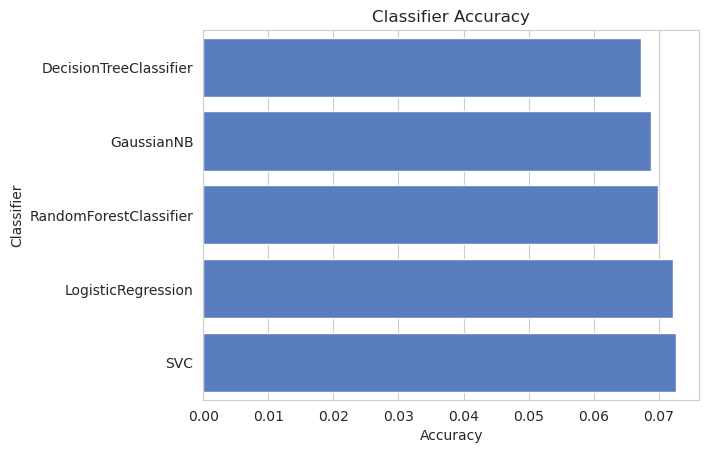

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



classifiers = [
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

/home/vlad/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6638/335855398.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/tmp/ipykernel_6638/335855398.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/tmp/ipykernel_6638/335855398.py:39: FutureWarning: The frame.append method is 

<Axes: title={'center': 'Classifier f1'}, xlabel='f1', ylabel='Classifier'>

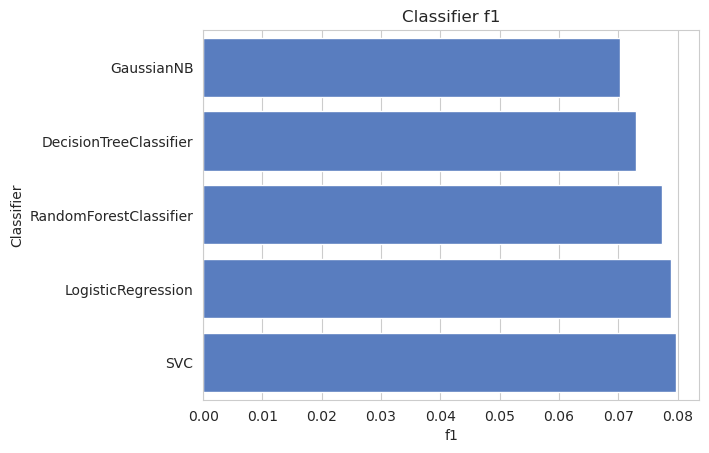

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classifiers = [
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "f1"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = f1_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('f1')
plt.title('Classifier f1')

sns.set_color_codes("muted")
sns.barplot(x='f1', y='Classifier', data=log.sort_values(by='f1'), color="b")

/home/vlad/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               Classifier  Accuracy  F1 Score
0                     SVC  0.725564  0.796657
1  DecisionTreeClassifier  0.684211  0.750000
2  RandomForestClassifier  0.725564  0.789625
3              GaussianNB  0.687970  0.702509
4      LogisticRegression  0.721805  0.788571


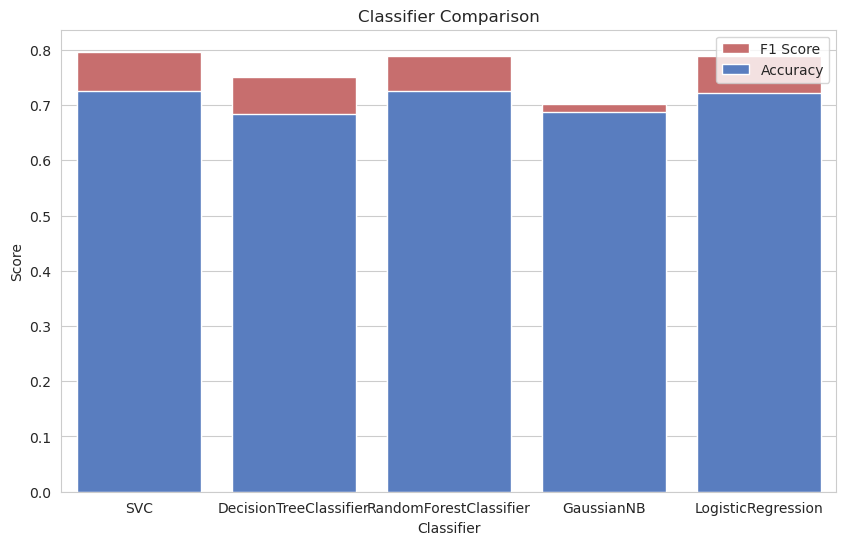

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Список классификаторов
classifiers = [
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

# Сравнение классификаторов
results = []

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

# Визуализация результатов
results_df = pd.DataFrame(results)
print(results_df)

# Построение графика
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='F1 Score', data=results_df, color="r", label='F1 Score')
sns.barplot(x='Classifier', y='Accuracy', data=results_df, color="b", label='Accuracy')
plt.title('Classifier Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend()
plt.show()